# Movie Analysis & Extraction

### Import Dependencies

In [1]:
#Data Cleaning
import pandas as pd
import numpy as np
from scipy.stats import linregress

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sn

# Data Extraction
import requests
import json
import time
from sqlalchemy import create_engine

## Import CSV file

In [2]:
#csv --> df of four sources

metacritic_df = pd.read_csv('./Resources/metacritic_movies.csv')
mojo_budget_df = pd.read_csv('./Resources/Mojo_budget_data.csv')


In [3]:
metacritic_df

,movie_title,release_date,genre,meta_mixed,meta_negative,meta_positive,metascore,user_mixed,user_negative,user_positive,userscore
0,Anatomy of a Murder,1-Jul-59,"Drama,Mystery,Thriller,Crime",0,0,15,95,0,0,3,tbd
1,Bringing Up Baby,18-Feb-38,"Comedy,Romance,Family",0,1,16,91,1,0,2,tbd
2,After Life,12-May-99,"Drama,Fantasy",0,0,19,91,0,2,1,tbd
3,Gavagai,3-Aug-18,Drama,1,0,6,91,0,1,2,tbd
4,The Hustler,25-Sep-61,"Drama,Sport",1,0,17,90,0,0,3,tbd
...,...,...,...,...,...,...,...,...,...,...,...
9116,Wild Reeds,10-May-95,Drama,2,0,11,80,1,0,3,8
9117,No Home Movie,1-Apr-16,Documentary,3,0,7,78,1,0,3,7.8
9118,Solas,8-Sep-00,Drama,2,0,14,75,1,0,3,7.5
9119,J.T. Leroy,26-Apr-19,"Biography,Drama",13,0,10,55,2,1,1,5.5


In [4]:
mojo_budget_df

,movie_id,movie_title,movie_year,director,writer,producer,composer,cinematographer,main_actor_1,main_actor_2,...,domestic,international,worldwide,mpaa,run_time,genre_1,genre_2,genre_3,genre_4,link
0,tt0118589,Glitter,2001,Vondie Curtis-Hall,Cheryl L. West,Laurence Mark,Terence Blanchard,Geoffrey Simpson,Mariah Carey,Eric Benét,...,4274407,997259,5271666,PG-13,1 hr 44 min,Drama,Music,Romance,NaN,https://www.boxofficemojo.com/title/tt0118589/...
1,tt0120630,Chicken Run,2000,Peter Lord,Peter Lord,Peter Lord,Harry Gregson-Williams,Simon Jacobs,Mel Gibson,Julia Sawalha,...,106834564,118000000,224834564,NaN,1 hr 24 min,Adventure,Animation,Comedy,Drama,https://www.boxofficemojo.com/title/tt0120630/...
2,tt0120667,Fantastic Four,2005,Tim Story,Mark Frost,Avi Arad,John Ottman,Oliver Wood,Ioan Gruffudd,Michael Chiklis,...,154696080,178839854,333535934,PG-13,1 hr 46 min,Action,Adventure,Family,Fantasy,https://www.boxofficemojo.com/title/tt0120667/...
3,tt0120679,Frida,2002,Julie Taymor,Hayden Herrera,Lindsay Flickinger,Elliot Goldenthal,Rodrigo Prieto,Salma Hayek,Alfred Molina,...,25885000,30413474,56298474,R,2 hr 3 min,Biography,Drama,Romance,NaN,https://www.boxofficemojo.com/title/tt0120679/...
4,tt0120681,From Hell,2001,Albert Hughes,Alan Moore,Jane Hamsher,Trevor Jones,Peter Deming,Johnny Depp,Heather Graham,...,31602566,42955549,74558115,R,2 hr 2 min,Horror,Mystery,Thriller,NaN,https://www.boxofficemojo.com/title/tt0120681/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2471,tt8688634,21 Bridges,2019,Brian Kirk,Adam Mervis,Chadwick Boseman,Alex Belcher,Paul Cameron,Chadwick Boseman,Sienna Miller,...,28539757,21400000,49939757,R,1 hr 39 min,Action,Crime,Drama,Thriller,https://www.boxofficemojo.com/title/tt8688634/...
2472,tt8946378,Knives Out,2019,Rian Johnson,Rian Johnson,Ram Bergman,Nathan Johnson,Steve Yedlin,Daniel Craig,Chris Evans,...,165363234,146189956,311553190,PG-13,2 hr 11 min,Comedy,Crime,Drama,Mystery,https://www.boxofficemojo.com/title/tt8946378/...
2473,tt9024106,Unplanned,2019,Chuck Konzelman,Abby Johnson,Chris Jones,Stephen Blake Kanicka,Drew Maw,Ashley Bratcher,Brooks Ryan,...,19005109,2046806,21051915,R,1 hr 49 min,Biography,Drama,NaN,NaN,https://www.boxofficemojo.com/title/tt9024106/...
2474,tt9134216,Playing with Fire,2019,Andy Fickman,Dan Ewen,Todd Garner,Nathan Wang,Dean Semler,John Cena,Keegan-Michael Key,...,44451847,24179822,68631669,PG,1 hr 36 min,Comedy,Family,NaN,NaN,https://www.boxofficemojo.com/title/tt9134216/...


### CSV Data Cleaning

In [5]:
#dropping columns with irrelevant data

cleaned_mojo_df= mojo_budget_df.drop(columns= ['movie_id','director', 'writer', 'producer', 'composer', 'cinematographer', 'main_actor_1', 'main_actor_2', 'main_actor_3', 'main_actor_4', 'genre_2', 'genre_3', 'genre_4', 'link' ])

cleaned_mojo_df

,movie_title,movie_year,budget,domestic,international,worldwide,mpaa,run_time,genre_1
0,Glitter,2001,22000000,4274407,997259,5271666,PG-13,1 hr 44 min,Drama
1,Chicken Run,2000,45000000,106834564,118000000,224834564,NaN,1 hr 24 min,Adventure
2,Fantastic Four,2005,100000000,154696080,178839854,333535934,PG-13,1 hr 46 min,Action
3,Frida,2002,12000000,25885000,30413474,56298474,R,2 hr 3 min,Biography
4,From Hell,2001,35000000,31602566,42955549,74558115,R,2 hr 2 min,Horror
...,...,...,...,...,...,...,...,...,...
2471,21 Bridges,2019,33000000,28539757,21400000,49939757,R,1 hr 39 min,Action
2472,Knives Out,2019,40000000,165363234,146189956,311553190,PG-13,2 hr 11 min,Comedy
2473,Unplanned,2019,6000000,19005109,2046806,21051915,R,1 hr 49 min,Biography
2474,Playing with Fire,2019,29900000,44451847,24179822,68631669,PG,1 hr 36 min,Comedy


In [6]:
metacritic_df

,movie_title,release_date,genre,meta_mixed,meta_negative,meta_positive,metascore,user_mixed,user_negative,user_positive,userscore
0,Anatomy of a Murder,1-Jul-59,"Drama,Mystery,Thriller,Crime",0,0,15,95,0,0,3,tbd
1,Bringing Up Baby,18-Feb-38,"Comedy,Romance,Family",0,1,16,91,1,0,2,tbd
2,After Life,12-May-99,"Drama,Fantasy",0,0,19,91,0,2,1,tbd
3,Gavagai,3-Aug-18,Drama,1,0,6,91,0,1,2,tbd
4,The Hustler,25-Sep-61,"Drama,Sport",1,0,17,90,0,0,3,tbd
...,...,...,...,...,...,...,...,...,...,...,...
9116,Wild Reeds,10-May-95,Drama,2,0,11,80,1,0,3,8
9117,No Home Movie,1-Apr-16,Documentary,3,0,7,78,1,0,3,7.8
9118,Solas,8-Sep-00,Drama,2,0,14,75,1,0,3,7.5
9119,J.T. Leroy,26-Apr-19,"Biography,Drama",13,0,10,55,2,1,1,5.5


In [7]:
cleaned_metacritic_df= metacritic_df.drop(columns= ['release_date', 'genre'])
cleaned_metacritic_df

,movie_title,meta_mixed,meta_negative,meta_positive,metascore,user_mixed,user_negative,user_positive,userscore
0,Anatomy of a Murder,0,0,15,95,0,0,3,tbd
1,Bringing Up Baby,0,1,16,91,1,0,2,tbd
2,After Life,0,0,19,91,0,2,1,tbd
3,Gavagai,1,0,6,91,0,1,2,tbd
4,The Hustler,1,0,17,90,0,0,3,tbd
...,...,...,...,...,...,...,...,...,...
9116,Wild Reeds,2,0,11,80,1,0,3,8
9117,No Home Movie,3,0,7,78,1,0,3,7.8
9118,Solas,2,0,14,75,1,0,3,7.5
9119,J.T. Leroy,13,0,10,55,2,1,1,5.5


In [8]:
# Merge dfs on movie_title
movie_db_df = pd.merge(cleaned_mojo_df, cleaned_metacritic_df, how="left", on="movie_title")
movie_db_df

,movie_title,movie_year,budget,domestic,international,worldwide,mpaa,run_time,genre_1,meta_mixed,meta_negative,meta_positive,metascore,user_mixed,user_negative,user_positive,userscore
0,Glitter,2001,22000000,4274407,997259,5271666,PG-13,1 hr 44 min,Drama,3.0,20.0,0.0,14.0,9,59,31,3.6
1,Chicken Run,2000,45000000,106834564,118000000,224834564,NaN,1 hr 24 min,Adventure,1.0,0.0,33.0,88.0,36,9,258,8.2
2,Fantastic Four,2005,100000000,154696080,178839854,333535934,PG-13,1 hr 46 min,Action,18.0,11.0,6.0,40.0,161,177,305,5.7
3,Fantastic Four,2005,100000000,154696080,178839854,333535934,PG-13,1 hr 46 min,Action,18.0,21.0,1.0,27.0,176,627,109,2.6
4,Frida,2002,12000000,25885000,30413474,56298474,R,2 hr 3 min,Biography,17.0,1.0,20.0,61.0,4,2,34,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2580,21 Bridges,2019,33000000,28539757,21400000,49939757,R,1 hr 39 min,Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2581,Knives Out,2019,40000000,165363234,146189956,311553190,PG-13,2 hr 11 min,Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2582,Unplanned,2019,6000000,19005109,2046806,21051915,R,1 hr 49 min,Biography,1.0,6.0,0.0,10.0,1,51,687,9.3
2583,Playing with Fire,2019,29900000,44451847,24179822,68631669,PG,1 hr 36 min,Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
final_movie_db_df=movie_db_df.drop_duplicates(subset=["movie_title", "movie_year"])
final_movie_db_df

,movie_title,movie_year,budget,domestic,international,worldwide,mpaa,run_time,genre_1,meta_mixed,meta_negative,meta_positive,metascore,user_mixed,user_negative,user_positive,userscore
0,Glitter,2001,22000000,4274407,997259,5271666,PG-13,1 hr 44 min,Drama,3.0,20.0,0.0,14.0,9,59,31,3.6
1,Chicken Run,2000,45000000,106834564,118000000,224834564,NaN,1 hr 24 min,Adventure,1.0,0.0,33.0,88.0,36,9,258,8.2
2,Fantastic Four,2005,100000000,154696080,178839854,333535934,PG-13,1 hr 46 min,Action,18.0,11.0,6.0,40.0,161,177,305,5.7
4,Frida,2002,12000000,25885000,30413474,56298474,R,2 hr 3 min,Biography,17.0,1.0,20.0,61.0,4,2,34,7.4
5,From Hell,2001,35000000,31602566,42955549,74558115,R,2 hr 2 min,Horror,10.0,7.0,15.0,54.0,23,37,54,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2580,21 Bridges,2019,33000000,28539757,21400000,49939757,R,1 hr 39 min,Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2581,Knives Out,2019,40000000,165363234,146189956,311553190,PG-13,2 hr 11 min,Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2582,Unplanned,2019,6000000,19005109,2046806,21051915,R,1 hr 49 min,Biography,1.0,6.0,0.0,10.0,1,51,687,9.3
2583,Playing with Fire,2019,29900000,44451847,24179822,68631669,PG,1 hr 36 min,Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
final_movie_db_df=final_movie_db_df.rename(columns= {"movie_title":"Title", "movie_year":"Year", "budget":"Budget", "domestic":"Domestic Revenue", "international":"International Revenue", "worldwide":"Worldwide Revenue", "mpaa":"MPAA Rating", "run_time":"Run Time", "genre_1":"Genre", "meta_mixed":"Metacritic Mixed Reviews", "meta_negative":"Metacritic Negative Reviews", "meta_positive":"Metacritic Positive Reviews", "metascore":"Metascore", "user_mixed":"Users Mixed Reviews", "user_negative":"Users Negative Reviews", "user_positive":"Users Positive Reviews", "userscore": "Userscore"})
final_movie_db_df

,Title,Year,Budget,Domestic Revenue,International Revenue,Worldwide Revenue,MPAA Rating,Run Time,Genre,Metacritic Mixed Reviews,Metacritic Negative Reviews,Metacritic Positive Reviews,Metascore,Users Mixed Reviews,Users Negative Reviews,Users Positive Reviews,Userscore
0,Glitter,2001,22000000,4274407,997259,5271666,PG-13,1 hr 44 min,Drama,3.0,20.0,0.0,14.0,9,59,31,3.6
1,Chicken Run,2000,45000000,106834564,118000000,224834564,NaN,1 hr 24 min,Adventure,1.0,0.0,33.0,88.0,36,9,258,8.2
2,Fantastic Four,2005,100000000,154696080,178839854,333535934,PG-13,1 hr 46 min,Action,18.0,11.0,6.0,40.0,161,177,305,5.7
4,Frida,2002,12000000,25885000,30413474,56298474,R,2 hr 3 min,Biography,17.0,1.0,20.0,61.0,4,2,34,7.4
5,From Hell,2001,35000000,31602566,42955549,74558115,R,2 hr 2 min,Horror,10.0,7.0,15.0,54.0,23,37,54,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2580,21 Bridges,2019,33000000,28539757,21400000,49939757,R,1 hr 39 min,Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2581,Knives Out,2019,40000000,165363234,146189956,311553190,PG-13,2 hr 11 min,Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2582,Unplanned,2019,6000000,19005109,2046806,21051915,R,1 hr 49 min,Biography,1.0,6.0,0.0,10.0,1,51,687,9.3
2583,Playing with Fire,2019,29900000,44451847,24179822,68631669,PG,1 hr 36 min,Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
final_movie_db_df = final_movie_db_df.replace('tbd', np.nan)
final_movie_db_df

,Title,Year,Budget,Domestic Revenue,International Revenue,Worldwide Revenue,MPAA Rating,Run Time,Genre,Metacritic Mixed Reviews,Metacritic Negative Reviews,Metacritic Positive Reviews,Metascore,Users Mixed Reviews,Users Negative Reviews,Users Positive Reviews,Userscore
0,Glitter,2001,22000000,4274407,997259,5271666,PG-13,1 hr 44 min,Drama,3.0,20.0,0.0,14.0,9,59,31,3.6
1,Chicken Run,2000,45000000,106834564,118000000,224834564,NaN,1 hr 24 min,Adventure,1.0,0.0,33.0,88.0,36,9,258,8.2
2,Fantastic Four,2005,100000000,154696080,178839854,333535934,PG-13,1 hr 46 min,Action,18.0,11.0,6.0,40.0,161,177,305,5.7
4,Frida,2002,12000000,25885000,30413474,56298474,R,2 hr 3 min,Biography,17.0,1.0,20.0,61.0,4,2,34,7.4
5,From Hell,2001,35000000,31602566,42955549,74558115,R,2 hr 2 min,Horror,10.0,7.0,15.0,54.0,23,37,54,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2580,21 Bridges,2019,33000000,28539757,21400000,49939757,R,1 hr 39 min,Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2581,Knives Out,2019,40000000,165363234,146189956,311553190,PG-13,2 hr 11 min,Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2582,Unplanned,2019,6000000,19005109,2046806,21051915,R,1 hr 49 min,Biography,1.0,6.0,0.0,10.0,1,51,687,9.3
2583,Playing with Fire,2019,29900000,44451847,24179822,68631669,PG,1 hr 36 min,Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
final_movie_db_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2475 entries, 0 to 2584
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Title                        2475 non-null   object 
 1   Year                         2475 non-null   int64  
 2   Budget                       2475 non-null   int64  
 3   Domestic Revenue             2475 non-null   int64  
 4   International Revenue        2475 non-null   int64  
 5   Worldwide Revenue            2475 non-null   int64  
 6   MPAA Rating                  2413 non-null   object 
 7   Run Time                     2475 non-null   object 
 8   Genre                        2475 non-null   object 
 9   Metacritic Mixed Reviews     2283 non-null   float64
 10  Metacritic Negative Reviews  2283 non-null   float64
 11  Metacritic Positive Reviews  2283 non-null   float64
 12  Metascore                    2283 non-null   float64
 13  Users Mixed Review

In [13]:
print(final_movie_db_df.isnull().sum())

Title                            0
Year                             0
Budget                           0
Domestic Revenue                 0
International Revenue            0
Worldwide Revenue                0
MPAA Rating                     62
Run Time                         0
Genre                            0
Metacritic Mixed Reviews       192
Metacritic Negative Reviews    192
Metacritic Positive Reviews    192
Metascore                      192
Users Mixed Reviews            192
Users Negative Reviews         192
Users Positive Reviews         192
Userscore                      197
dtype: int64


In [14]:
#turn object types into floats
final_movie_db_df["Userscore"] = final_movie_db_df['Userscore'].astype(float)
final_movie_db_df["Users Mixed Reviews"] = final_movie_db_df["Users Mixed Reviews"].str.replace(',','').astype(float)
final_movie_db_df["Users Negative Reviews"] = final_movie_db_df["Users Negative Reviews"].str.replace(',','').astype(float)
final_movie_db_df["Users Positive Reviews"] = final_movie_db_df["Users Positive Reviews"].str.replace(',','').astype(float)



In [15]:
final_movie_db_df= final_movie_db_df.fillna(final_movie_db_df.mean())
final_movie_db_df

,Title,Year,Budget,Domestic Revenue,International Revenue,Worldwide Revenue,MPAA Rating,Run Time,Genre,Metacritic Mixed Reviews,Metacritic Negative Reviews,Metacritic Positive Reviews,Metascore,Users Mixed Reviews,Users Negative Reviews,Users Positive Reviews,Userscore
0,Glitter,2001,22000000,4274407,997259,5271666,PG-13,1 hr 44 min,Drama,3.000000,20.000000,0.00000,14.000000,9.000000,59.000000,31.00000,3.600000
1,Chicken Run,2000,45000000,106834564,118000000,224834564,NaN,1 hr 24 min,Adventure,1.000000,0.000000,33.00000,88.000000,36.000000,9.000000,258.00000,8.200000
2,Fantastic Four,2005,100000000,154696080,178839854,333535934,PG-13,1 hr 46 min,Action,18.000000,11.000000,6.00000,40.000000,161.000000,177.000000,305.00000,5.700000
4,Frida,2002,12000000,25885000,30413474,56298474,R,2 hr 3 min,Biography,17.000000,1.000000,20.00000,61.000000,4.000000,2.000000,34.00000,7.400000
5,From Hell,2001,35000000,31602566,42955549,74558115,R,2 hr 2 min,Horror,10.000000,7.000000,15.00000,54.000000,23.000000,37.000000,54.00000,5.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2580,21 Bridges,2019,33000000,28539757,21400000,49939757,R,1 hr 39 min,Action,11.341656,5.542269,15.08629,52.588261,51.708279,43.457293,207.64389,6.543854
2581,Knives Out,2019,40000000,165363234,146189956,311553190,PG-13,2 hr 11 min,Comedy,11.341656,5.542269,15.08629,52.588261,51.708279,43.457293,207.64389,6.543854
2582,Unplanned,2019,6000000,19005109,2046806,21051915,R,1 hr 49 min,Biography,1.000000,6.000000,0.00000,10.000000,1.000000,51.000000,687.00000,9.300000
2583,Playing with Fire,2019,29900000,44451847,24179822,68631669,PG,1 hr 36 min,Comedy,11.341656,5.542269,15.08629,52.588261,51.708279,43.457293,207.64389,6.543854


In [38]:
bar2_df = final_movie_db_df.groupby(final_movie_db_df['MPAA Rating']).mean()['Worldwide Revenue']
bar2_df

MPAA Rating
G        2.444110e+08
NC-17    2.518160e+07
PG       2.156528e+08
PG-13    1.937595e+08
R        8.872000e+07
Name: Worldwide Revenue, dtype: float64

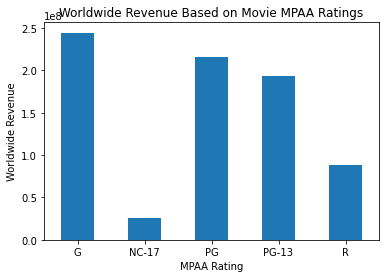

In [42]:
#Visualize



ax1 = bar2_df.plot.bar(x='MPAA Rating', y='Worldwide Revenue', rot=0)

ax1.set_xlabel('MPAA Rating')
# # plt.xticks(rotation = 75) # Rotates X-Axis Ticks by 45-degrees
ax1.set_ylabel('Worldwide Revenue')
ax1.set_title('Worldwide Revenue Based on Movie MPAA Ratings')

plt.show()

In [ ]:
ax1 = bar2_df.plot.bar(x='MPAA Rating', y='Worldwide Revenue', rot=0)

ax1.set_xlabel('MPAA Rating')
# # plt.xticks(rotation = 75) # Rotates X-Axis Ticks by 45-degrees
ax1.set_ylabel('Worldwide Revenue')
ax1.set_title('Worldwide Revenue Based on Movie MPAA Ratings')

plt.show()

### Save to CSV for future use

In [16]:
#Save df to csv

#random_name_csv.to_csv('./Resources/Random_name2.csv',index=False)

final_movie_db_df.to_csv('./Resources/movie_db.csv', index=False, header=True)

In [17]:
final_movie_db_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2475 entries, 0 to 2584
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Title                        2475 non-null   object 
 1   Year                         2475 non-null   int64  
 2   Budget                       2475 non-null   int64  
 3   Domestic Revenue             2475 non-null   int64  
 4   International Revenue        2475 non-null   int64  
 5   Worldwide Revenue            2475 non-null   int64  
 6   MPAA Rating                  2413 non-null   object 
 7   Run Time                     2475 non-null   object 
 8   Genre                        2475 non-null   object 
 9   Metacritic Mixed Reviews     2475 non-null   float64
 10  Metacritic Negative Reviews  2475 non-null   float64
 11  Metacritic Positive Reviews  2475 non-null   float64
 12  Metascore                    2475 non-null   float64
 13  Users Mixed Review

In [18]:
final_movie_db_df.describe()

,Year,Budget,Domestic Revenue,International Revenue,Worldwide Revenue,Metacritic Mixed Reviews,Metacritic Negative Reviews,Metacritic Positive Reviews,Metascore,Users Mixed Reviews,Users Negative Reviews,Users Positive Reviews,Userscore
count,2475.000000,2.475000e+03,2.475000e+03,2.475000e+03,2.475000e+03,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000
mean,2008.868283,5.055986e+07,6.680369e+07,8.810686e+07,1.549105e+08,11.341656,5.542269,15.086290,52.588261,51.708279,43.457293,207.643890,6.543854
std,5.631900,4.956858e+07,8.275647e+07,1.509255e+08,2.256294e+08,5.870246,5.494565,11.618359,16.699239,69.065642,75.150167,382.062626,1.475199
min,2000.000000,2.200000e+02,8.000000e+03,9.990000e+02,7.962400e+04,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,1.000000
25%,2004.000000,1.600000e+07,1.695038e+07,7.737332e+06,2.967042e+07,7.000000,1.000000,5.000000,41.000000,13.000000,9.000000,30.000000,5.800000
50%,2009.000000,3.500000e+07,3.978503e+07,3.384364e+07,7.602513e+07,11.341656,4.000000,14.000000,52.588261,34.000000,24.000000,88.000000,6.543854
75%,2014.000000,6.900000e+07,8.306080e+07,9.788564e+07,1.805854e+08,15.000000,8.000000,23.000000,64.000000,60.000000,45.000000,207.643890,7.600000
max,2020.000000,3.560000e+08,9.366622e+08,2.029931e+09,2.797801e+09,36.000000,30.000000,56.000000,100.000000,1197.000000,1423.000000,5128.000000,9.400000


In [19]:
engine=create_engine("sqlite:///final_movie_db.sqlite", echo=True)
sqlite_connection=engine.connect()

2021-06-16 19:11:17,119 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2021-06-16 19:11:17,120 INFO sqlalchemy.engine.base.Engine ()
2021-06-16 19:11:17,127 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2021-06-16 19:11:17,129 INFO sqlalchemy.engine.base.Engine ()


In [20]:
sqlite_table="final_movie"
final_movie_db_df.to_sql(sqlite_table, sqlite_connection, if_exists="fail")

2021-06-16 19:11:17,148 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("final_movie")
2021-06-16 19:11:17,149 INFO sqlalchemy.engine.base.Engine ()
2021-06-16 19:11:17,154 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("final_movie")
2021-06-16 19:11:17,155 INFO sqlalchemy.engine.base.Engine ()
2021-06-16 19:11:17,160 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE final_movie (
	"index" BIGINT, 
	"Title" TEXT, 
	"Year" BIGINT, 
	"Budget" BIGINT, 
	"Domestic Revenue" BIGINT, 
	"International Revenue" BIGINT, 
	"Worldwide Revenue" BIGINT, 
	"MPAA Rating" TEXT, 
	"Run Time" TEXT, 
	"Genre" TEXT, 
	"Metacritic Mixed Reviews" FLOAT, 
	"Metacritic Negative Reviews" FLOAT, 
	"Metacritic Positive Reviews" FLOAT, 
	"Metascore" FLOAT, 
	"Users Mixed Reviews" FLOAT, 
	"Users Negative Reviews" FLOAT, 
	"Users Positive Reviews" FLOAT, 
	"Userscore" FLOAT
)


2021-06-16 19:11:17,162 INFO sqlalchemy.engine.base.Engine ()
2021-06-16 19:11:17,175 INFO sqlalchemy.engine.base.Engi

In [21]:
sqlite_connection.close()